In [1]:
# here are some popular sites where similar dataset has been used and mape calculated using similar steps, algos

# so this shows that we have not done too badly :-)

# https://www.geeksforgeeks.org/medical-insurance-price-prediction-using-machine-learning-python/
# https://binginagesh.medium.com/estimating-medical-insurance-charges-4373979cd421
# https://www.kaggle.com/code/prasy46/insurance-premium-prediction-by-linear-regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Read in the dataset in CSV format
df = pd.read_csv('insurance2.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
# two columns are label columns. in this exercise - charges and insuranceclaim
# for regression scenario, select charges and for classification, select insuranceclam

In [6]:
df = df.drop('insuranceclaim', axis=1) # we drop insuranceclaim and retain only charges
y = df.charges # this is the label column
df = df.drop('charges', axis=1) # dropping from the features set

In [7]:
# Check dtypes
print("\nData Types:")
print(df.dtypes)


Data Types:
age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
dtype: object


In [8]:
# Convert 'sex', 'smoker', and 'region' columns to object type
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('object')

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [10]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region
count,1338.000000,1338.0,1338.000000,1338.000000,1338.0,1338.0
unique,NaN,2.0,NaN,NaN,2.0,4.0
top,NaN,1.0,NaN,NaN,0.0,2.0
freq,NaN,676.0,NaN,NaN,1064.0,364.0
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN
std,14.049960,NaN,6.098187,1.205493,NaN,NaN
min,18.000000,NaN,15.960000,0.000000,NaN,NaN
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN


In [66]:
# Describe the dataset
print("Dataset Summary Statistics:")
print(df.describe())

Dataset Summary Statistics:
               age          bmi     children
count  1338.000000  1338.000000  1338.000000
mean     39.207025    30.663397     1.094918
std      14.049960     6.098187     1.205493
min      18.000000    15.960000     0.000000
25%      27.000000    26.296250     0.000000
50%      39.000000    30.400000     1.000000
75%      51.000000    34.693750     2.000000
max      64.000000    53.130000     5.000000


In [67]:
# Check for missing values and replace with mean for numeric columns, and mode for object columns
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(include='object')

In [138]:
df_num.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [69]:
df_cat.head()

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1


In [70]:
# how we handle missing values? try these as part of your homework exercise
# [1] drop the row
# [2] use mean to backfill if there are no outliers
# [3] use median to backfill

In [71]:
# Replace missing values in numeric columns with mean
df_num = df_num.fillna(df_num.mean())

In [72]:
# this is a simple column by column way to fillna in category columns

# handle the missing values in sex column
df.sex.fillna(df.sex.mode()[0])
# handle the missing values in region column
df.region.fillna(df.region.mode()[0])
# handle the missing values in smoker column
df.smoker.fillna(df.smoker.mode()[0])

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [73]:
# this cell gradually builds up the line of code in the next cell for your understanding

df_cat # this gets the object columns

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1
...,...,...,...
1333,1,0,1
1334,0,0,0
1335,0,0,2
1336,0,0,3


In [141]:
# quick recap of mode and picking the first if there are multiple modes

some_array = pd.Series([1,1,1,2,2,2,3,3])
some_array.mode()[0]

1

In [75]:
df_cat.mode() # this gets the modes of each of the columns

,sex,smoker,region
0,1,0,2


In [76]:
df_cat.mode().iloc[0] # this gets the first row of this. remember there can be multiple modes

sex       1
smoker    0
region    2
Name: 0, dtype: object

In [77]:
# df_cat.fillna() selects na values and fill with the substitute values i.e. the modes

df_cat.fillna(df_cat.mode().iloc[0]) # this makes the cat columns into numeric

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1
...,...,...,...
1333,1,0,1
1334,0,0,0
1335,0,0,2
1336,0,0,3


In [78]:
df_cat.fillna(df_cat.mode().iloc[0]).dtypes

sex       int64
smoker    int64
region    int64
dtype: object

In [79]:
df_cat.fillna(df_cat.mode().iloc[0]).astype('object') # makes them category again

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1
...,...,...,...
1333,1,0,1
1334,0,0,0
1335,0,0,2
1336,0,0,3


In [80]:
# Replace missing values in object columns with mode
df_cat = df_cat.fillna(df_cat.mode().iloc[0])

<Axes: >

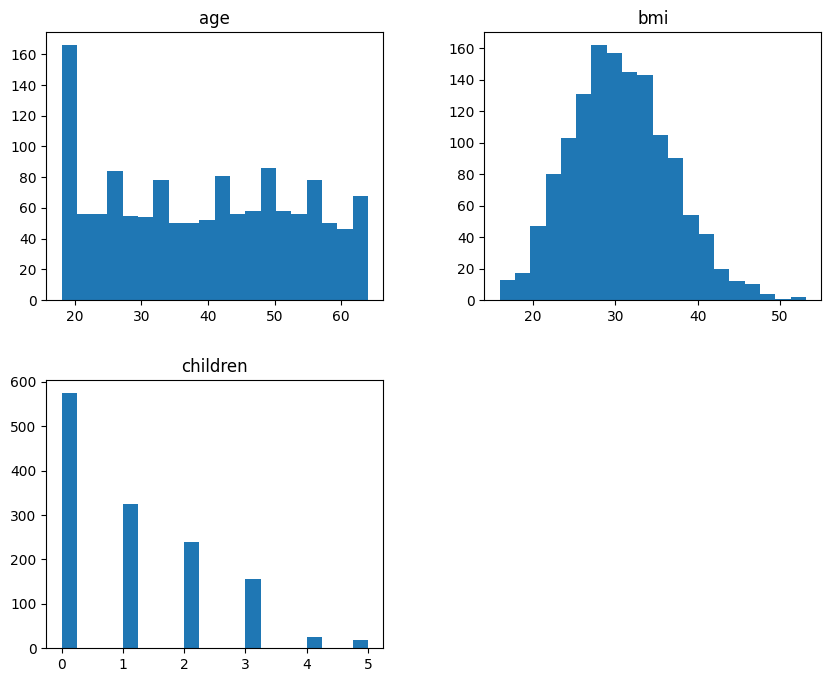

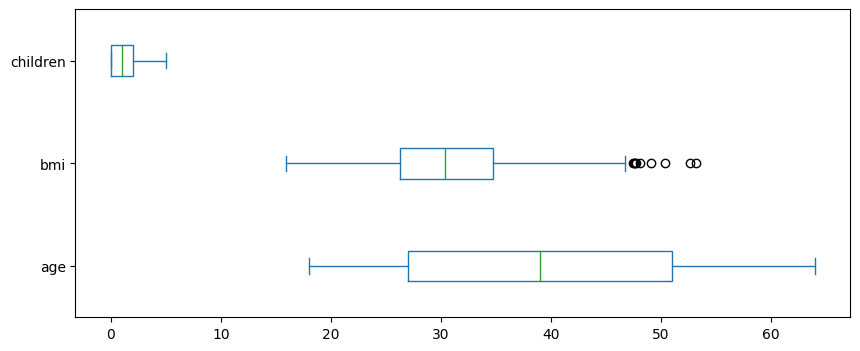

In [81]:
# Univariate plots: Histogram and box plot for numeric columns
df_num.hist(figsize=(10, 8), bins=20, grid=False)
df_num.plot(kind='box', vert=False, figsize=(10, 4))

In [82]:
# value counts of category columns
df.sex.value_counts()

# uncomment this to see the bar plot
#df.sex.value_counts().plot(kind='bar')

1    676
0    662
Name: sex, dtype: int64

In [83]:
df.smoker.value_counts()

# uncomment this to see the bar plot
#df.smoker.value_counts().plot(kind='bar')

0    1064
1     274
Name: smoker, dtype: int64

In [142]:
# One-hot encoding of object columns
ohe = OneHotEncoder()
df_cat_encoded = ohe.fit_transform(df_cat).toarray()
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns=ohe.get_feature_names_out(df_cat.columns.tolist()))

In [143]:
df_cat_encoded

,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [86]:
# this is another way of getting OHE done.

# One-hot encoding of object columns using pd.get_dummies
#df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)

# Output the one-hot encoded DataFrame
#print(df_cat_encoded)

In [87]:
# Rescale numeric columns using z-score
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled, columns=df_num.columns)

In [88]:
# Merge the encoded categorical columns and rescaled numeric columns into one dataset
df_merged = pd.concat([df_num_scaled, df_cat_encoded], axis=1)

In [89]:
# IMPORTANT: as we handle same dataset as different types the rows are kept intact.
# if you want to drop rows etc do it in the merged dataset.
df.shape, df_num.shape, df_cat.shape, df_merged.shape, y.shape

((1338, 6), (1338, 3), (1338, 3), (1338, 8), (1338,))

In [90]:
df_merged['charges'] = y

In [91]:
df_merged.head()

,age,bmi,children,sex_1,smoker_1,region_1,region_2,region_3,charges
0,-1.438764,-0.453320,-0.908614,0.0,1.0,0.0,0.0,1.0,16884.92400
1,-1.509965,0.509621,-0.078767,1.0,0.0,0.0,1.0,0.0,1725.55230
2,-0.797954,0.383307,1.580926,1.0,0.0,0.0,1.0,0.0,4449.46200
3,-0.441948,-1.305531,-0.908614,1.0,0.0,1.0,0.0,0.0,21984.47061
4,-0.513149,-0.292556,-0.908614,1.0,0.0,1.0,0.0,0.0,3866.85520


In [92]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_outlier = df_num < Q1 - 1.5*IQR
upper_outlier = df_num > Q3 + 1.5*IQR

df_merged_trimmed = df_merged[~(lower_outlier | upper_outlier).any(axis=1)]

In [93]:
X = df_merged_trimmed.drop('charges', axis=1)
y = df_merged_trimmed.charges

In [94]:
# Split the dataset into a 70:30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
# Apply KNN regressor with K=5. We selected an arbitrary K now. later we will learn how to make a considered choice.
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [96]:
# Estimate training MAPE (Mean Absolute Percentage Error)
y_train_pred = knn.predict(X_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
print("Training MAPE: ", np.round(mape_train,4))

Training MAPE:  0.298


In [97]:
# this is how MAPE is calculated
np.mean(np.abs(y_train - y_train_pred) / y_train)*100

29.804974588679688

In [98]:
# Estimate test MAPE (Mean Absolute Percentage Error)
y_test_pred = knn.predict(X_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
print("Test MAPE: ", np.round(mape_test,2))

Test MAPE:  0.39


In [121]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.8078455383909592, 0.6647204443583236)

In [99]:
# just a demonstration of varying K values and checking for performance

In [136]:
k = [1,2,3,4,5,8]

for K in k:   

    print("K:",K)
    # Apply KNN regressor with K=5. We selected an arbitrary K now. later we will learn how to make a considered choice.
    knn = KNeighborsRegressor(n_neighbors=K)
    knn.fit(X_train, y_train)
    
    # Estimate training MAE (Mean Absolute Error)
    y_train_pred = knn.predict(X_train)
    mape_train = mean_absolute_error(y_train, y_train_pred)
    print("Training MAE: ", np.round(mape_train,2))
    
    # Estimate test MAPE (Mean Absolute Error)
    y_test_pred = knn.predict(X_test)
    mape_test = mean_absolute_error(y_test, y_test_pred)
    print("Test MAE: ", np.round(mape_test,2))
    
    # Estimate training MAE (Mean Absolute Error)
    y_train_pred = knn.predict(X_train)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    print("Training MAPE: ", np.round(mape_train,2))
    
    # Estimate test MAPE (Mean Absolute Error)
    y_test_pred = knn.predict(X_test)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    print("Test MAPE: ", np.round(mape_test,2))
    
    # r square
    print(knn.score(X_train, y_train), knn.score(X_test, y_test))

K: 1
Training MAE:  20.58
Test MAE:  3780.32
Training MAPE:  0.01
Test MAPE:  0.35
0.9973148807943665 0.5793508030376485
K: 2
Training MAE:  1896.52
Test MAE:  3507.88
Training MAPE:  0.2
Test MAPE:  0.37
0.9081195653080945 0.7026304344626432
K: 3
Training MAE:  2542.46
Test MAE:  3931.22
Training MAPE:  0.25
Test MAPE:  0.4
0.8654687527456089 0.6701815300404844
K: 4
Training MAE:  2934.94
Test MAE:  4031.47
Training MAPE:  0.29
Test MAPE:  0.41
0.834475288610512 0.6642653811501233
K: 5
Training MAE:  3213.53
Test MAE:  4030.23
Training MAPE:  0.3
Test MAPE:  0.39
0.8078455383909592 0.6647204443583236
K: 8
Training MAE:  3699.7
Test MAE:  4249.0
Training MAPE:  0.34
Test MAPE:  0.39
0.7422953920779254 0.6517787297895441


In [101]:
# homework:
# study this code, understand what is happening and add to comments
# improve the code by adding any steps that you can identify. for e.g. more plots?
# study the dataset, see what transformations have been done. do you see any alternative ways of approaching?
# learn why we are splitting as train and test and what is MAPE helping us do

In [ ]:
# what if we tried some other algorithms? 
# Below are quick previews of linear regression and decision tree regressors

In [128]:
from sklearn.tree import DecisionTreeRegressor

In [129]:
dtree = DecisionTreeRegressor(max_depth=6)

In [130]:
dtreg = dtree.fit(X_train,y_train)

In [131]:
mean_absolute_error(y_train, dtreg.predict(X_train)),mean_absolute_error(y_test, dtreg.predict(X_test))

(2094.0769780459955, 2445.851433154971)

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
lm = LinearRegression()

In [134]:
linreg = lm.fit(X_train, y_train)

In [135]:
mean_absolute_error(y_train, linreg.predict(X_train)),mean_absolute_error(y_test, linreg.predict(X_test))

(4272.652159281077, 3862.5719322623036)